## Task Description

The overall target of the task is:
1. Extraction of timeseries data for actual temperature (TEMPERATUR INNEN_IST) and pressure (DRUCK INNEN_IST) values per cycle, based on the overall timeseries data within the give timeframe (2024-04-08 00:00:00 until 2024-04-10 23:59:59).
2. Plot a set of temperature / pressure curves (line plot per cycle).
3. Describe your data transformation steps in a small document (can be PowerPoint Presentation or Markdown File).
4. BONUS (optional): Detect cycles that are not okay based on the average shape of the actual temperature (TEMPERATUR INNEN_IST) and pressure (DRUCK INNEN_IST) values per cycle.

For this activity was used this notebook of Google colab due:

1. It's entirely cloud-based, meaning you don't need to install any software on your local machine.

2. Pre-Installed Libraries:  Colab  with many popular data science libraries pre-installed

3. Integration with Google Services: integrates seamlessly  Google Drive.

4. Notebook Environment: Colab uses Jupyter Notebooks, which provide an interactive, cell-based interface that makes it easy to write and execute code incrementally.

##Defined functions:



```
# get_data(file_name, root_dir):
```
Practically finds all the parquet files that have the same name (UUID) in a directory and then create a df.




```
transform_filter(df, start_date, end_date):
```

This functions helps a lot converting the systime that the PLC registered to a format for data engineering.

Finally there's a filter the data accordgin a range.

!!!The given data is in range that the rections enuntiates, anyways the filters is made.



```
plot(df, y_column_name, title, x_label, y_label, sample):

plot_int(df, y_column_name, title, x_label, y_label, sample):
```

These functions resamples the values, because some values were sampled a lot of times in a little range of time. That provokes noise in the plotting.

A second plotting function using other python librarie to interact with the curve.

###Ingest data:

First of all is ingested the config file:

1. Gives the exact UUID of the labels of interest: Pressure and Temperature.
2. It's possible to see how type of data was recorded, in both cases were INT16
3. The indexes were so useful to relation the UUID, confi and Label.


```
According the config File:

89. TEMPERATUR INNEN_IST    
    UUID: 5cde150d-c044-4e55-8c48-73321e0c0f27     
    Data type: INT16

90. DRUCK INNEN_IST      
    UUID: 67da707a-735b-497d-9870-40349919814c     
    Data type: INT16
```


Then it's used the funciton get_data to get the df_of the temperature



```
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412769 entries, 0 to 412768
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   uuid             412769 non-null  object
 1   sequence_number  412769 non-null  int32  
 2   systime          412769 non-null  int64  
 3   plctime          412769 non-null  int64  
 4   is_delta         412769 non-null  bool   
 5   value_integer    412769 non-null  int64  
 6   value_string     0 non-null       object
 7   value_double     0 non-null       float64
 8   value_bool       0 non-null       object
 9   value_bytes      0 non-null       object
dtypes: bool(1), float64(1), int32(1), int64(3), object(4)
memory usage: 27.2+ MB


Neither NaNs nor nulls nor mixed data types in labels: "systime" and "value_integer"

THE DATA IS USEFUL
```



Relevant transformation for Temperature and Pressure data:

1. Convert the timestamp value 'systime'to date time format.
2. Add the ingestion date.
3. Select only the required columns


Final dataframes:
df_temperature
df_pressure

###Plotting:

When its tried to plot directly the integer_value of the df_temperature happens:





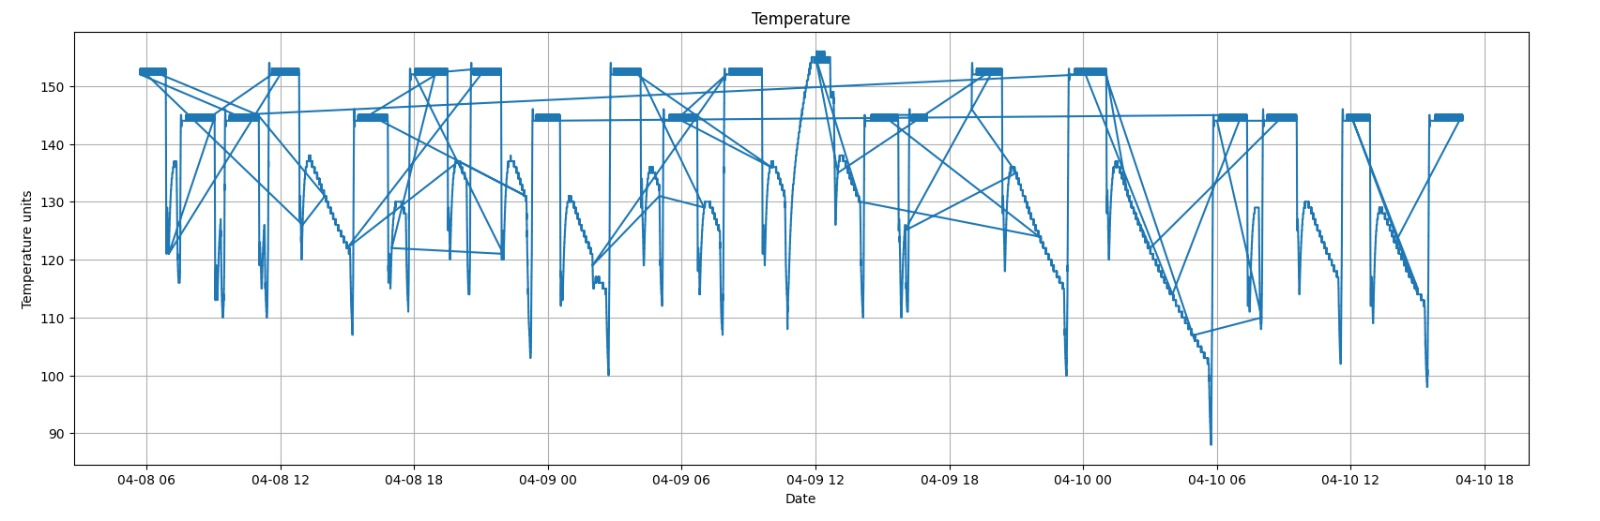

Thats because can be duplicated values or theres a lot of values in little time span.

Taking the ASSUMPTION that this is a machine who doesnt need data so fast, Its possible to resample the values to each minute, getting:


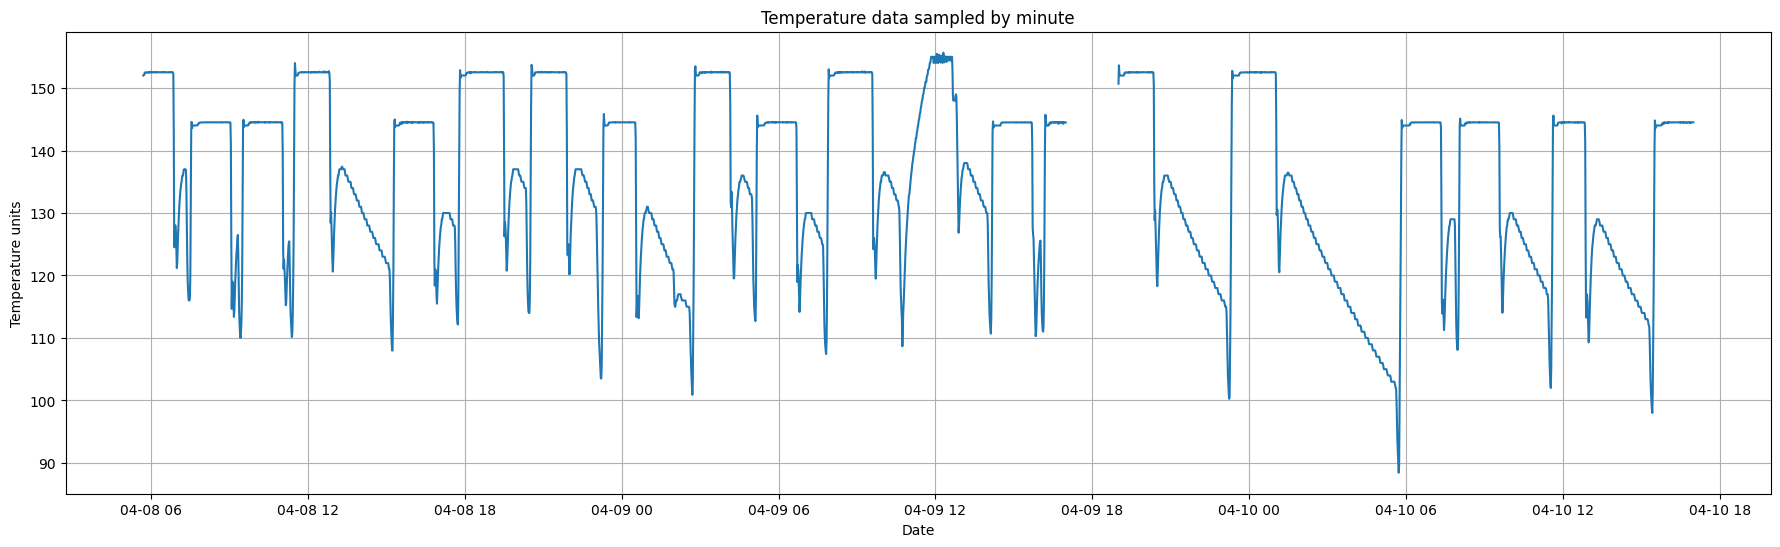

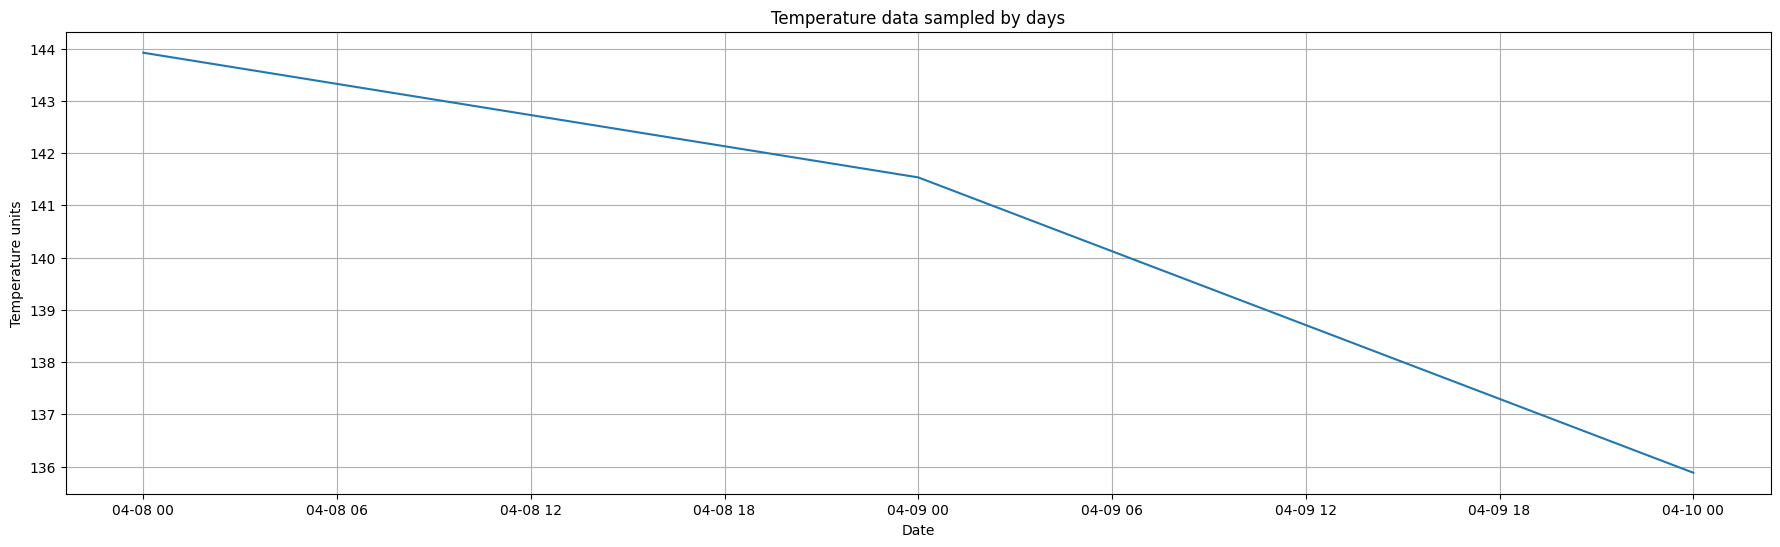

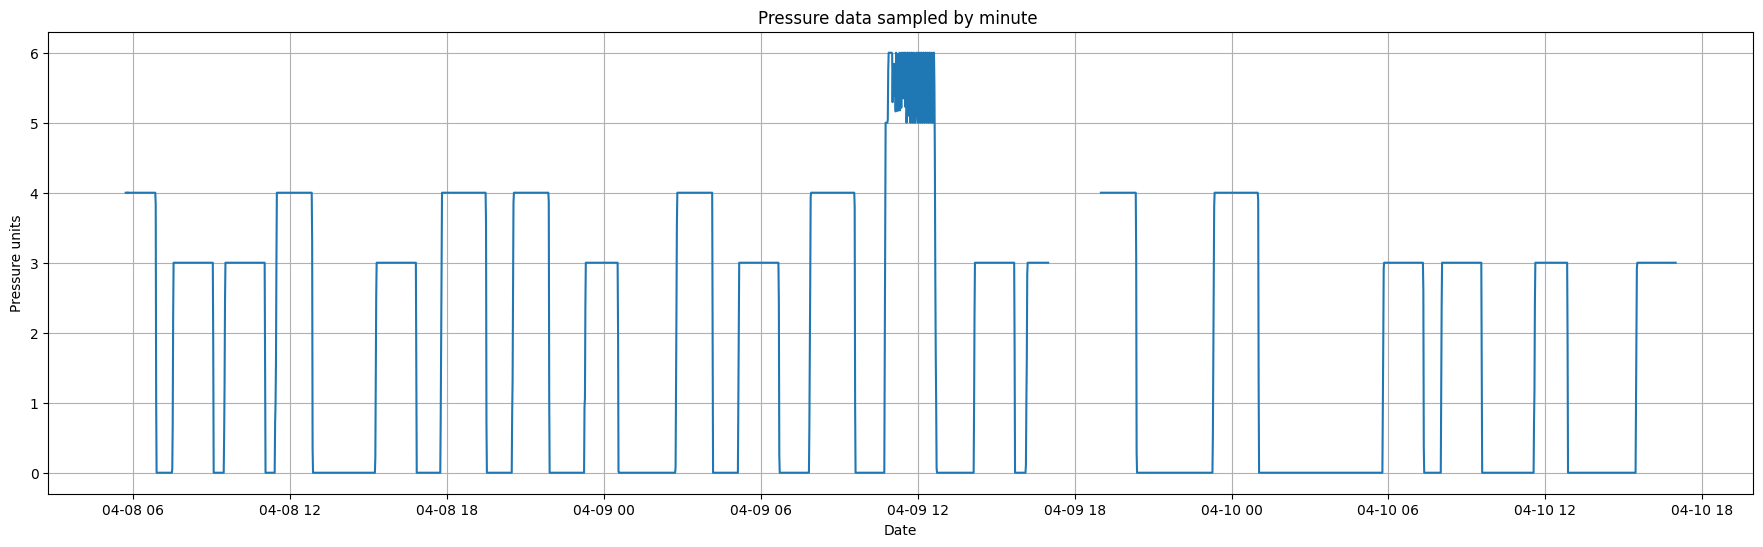

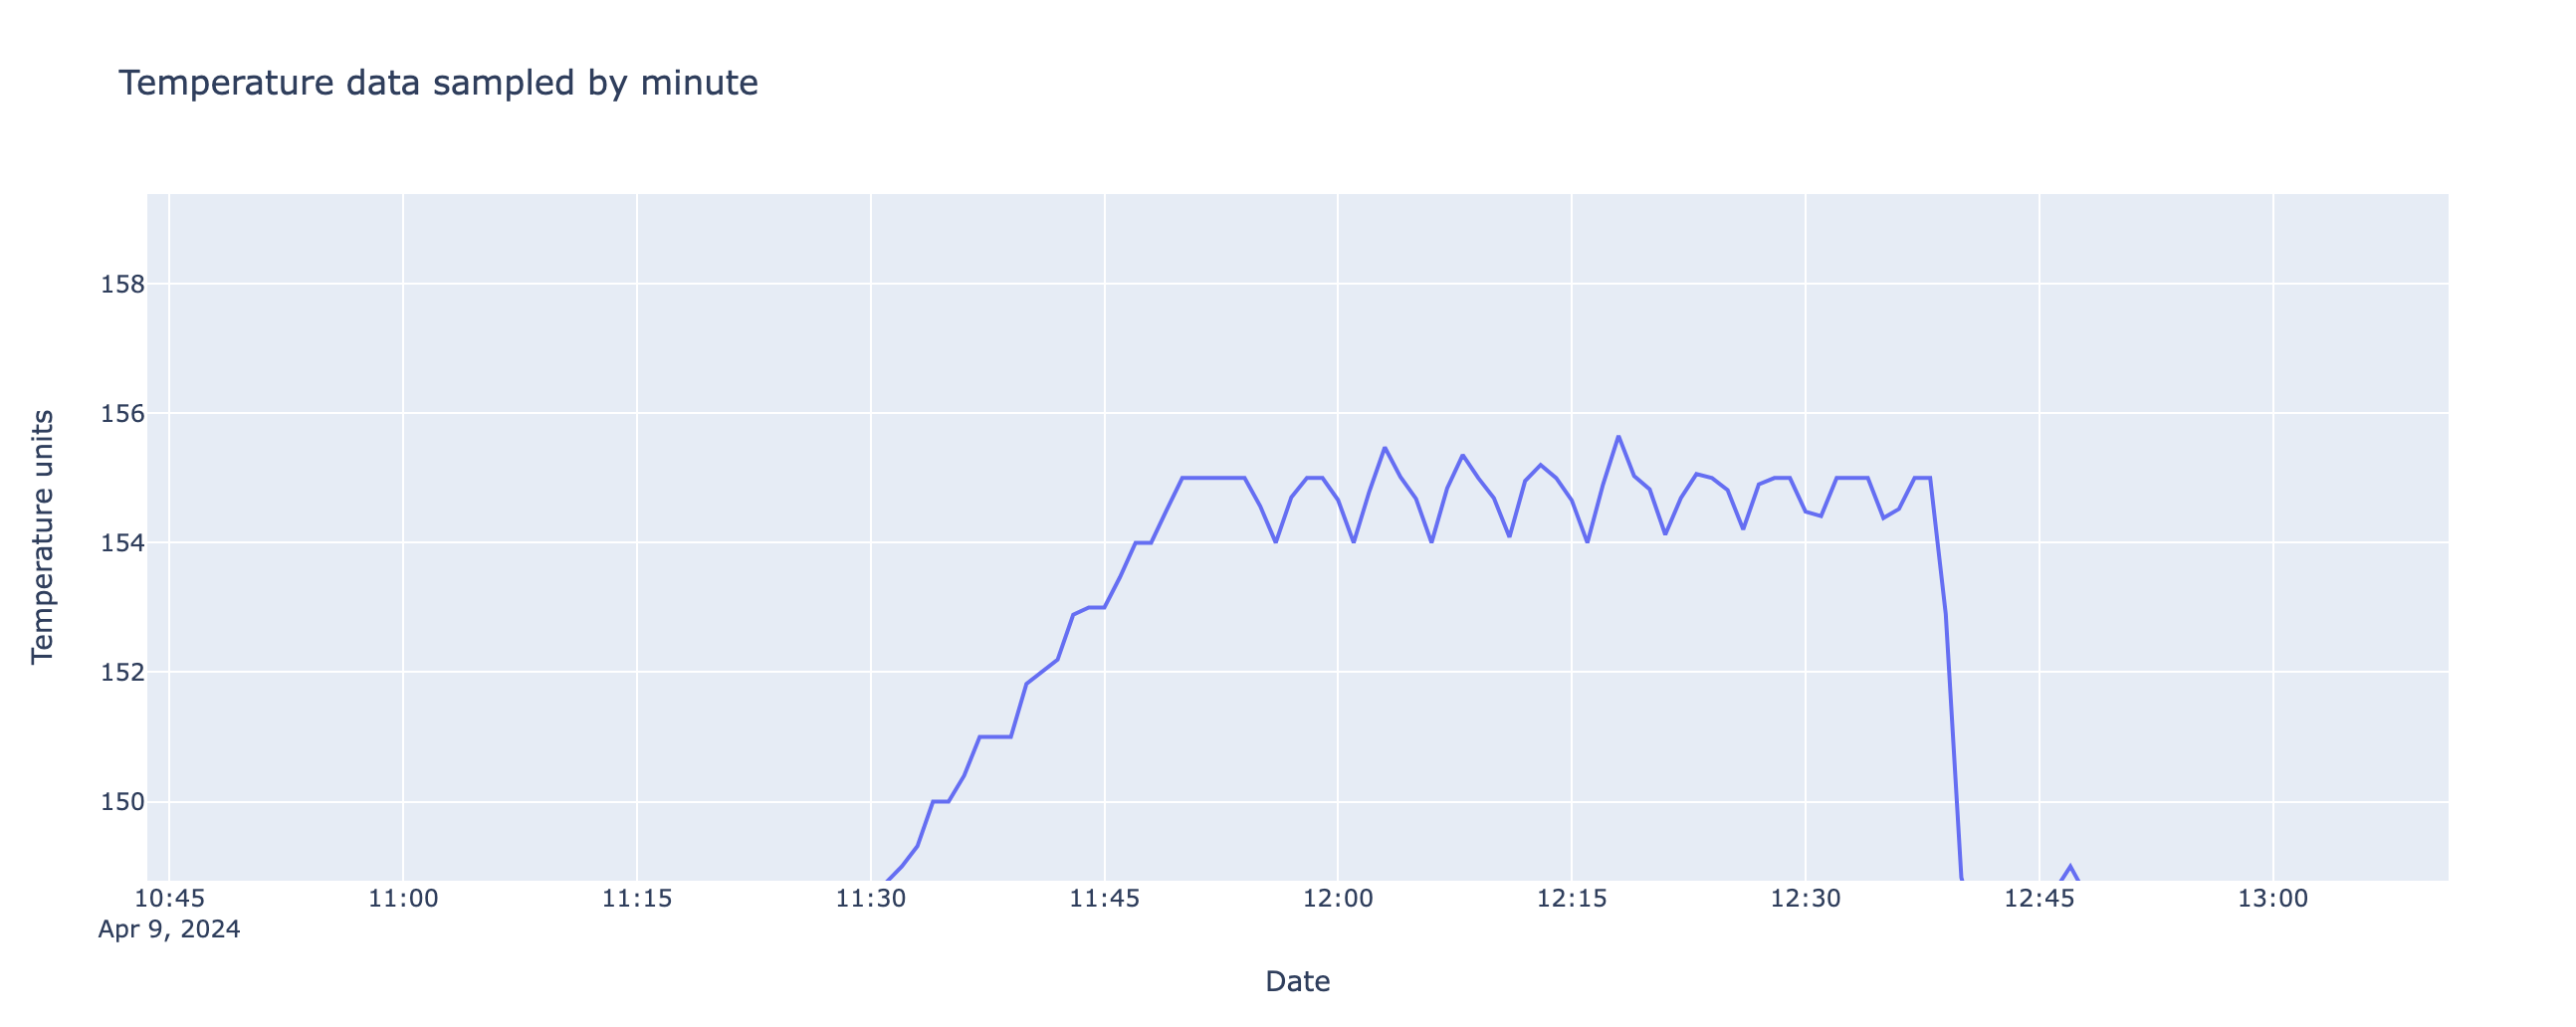

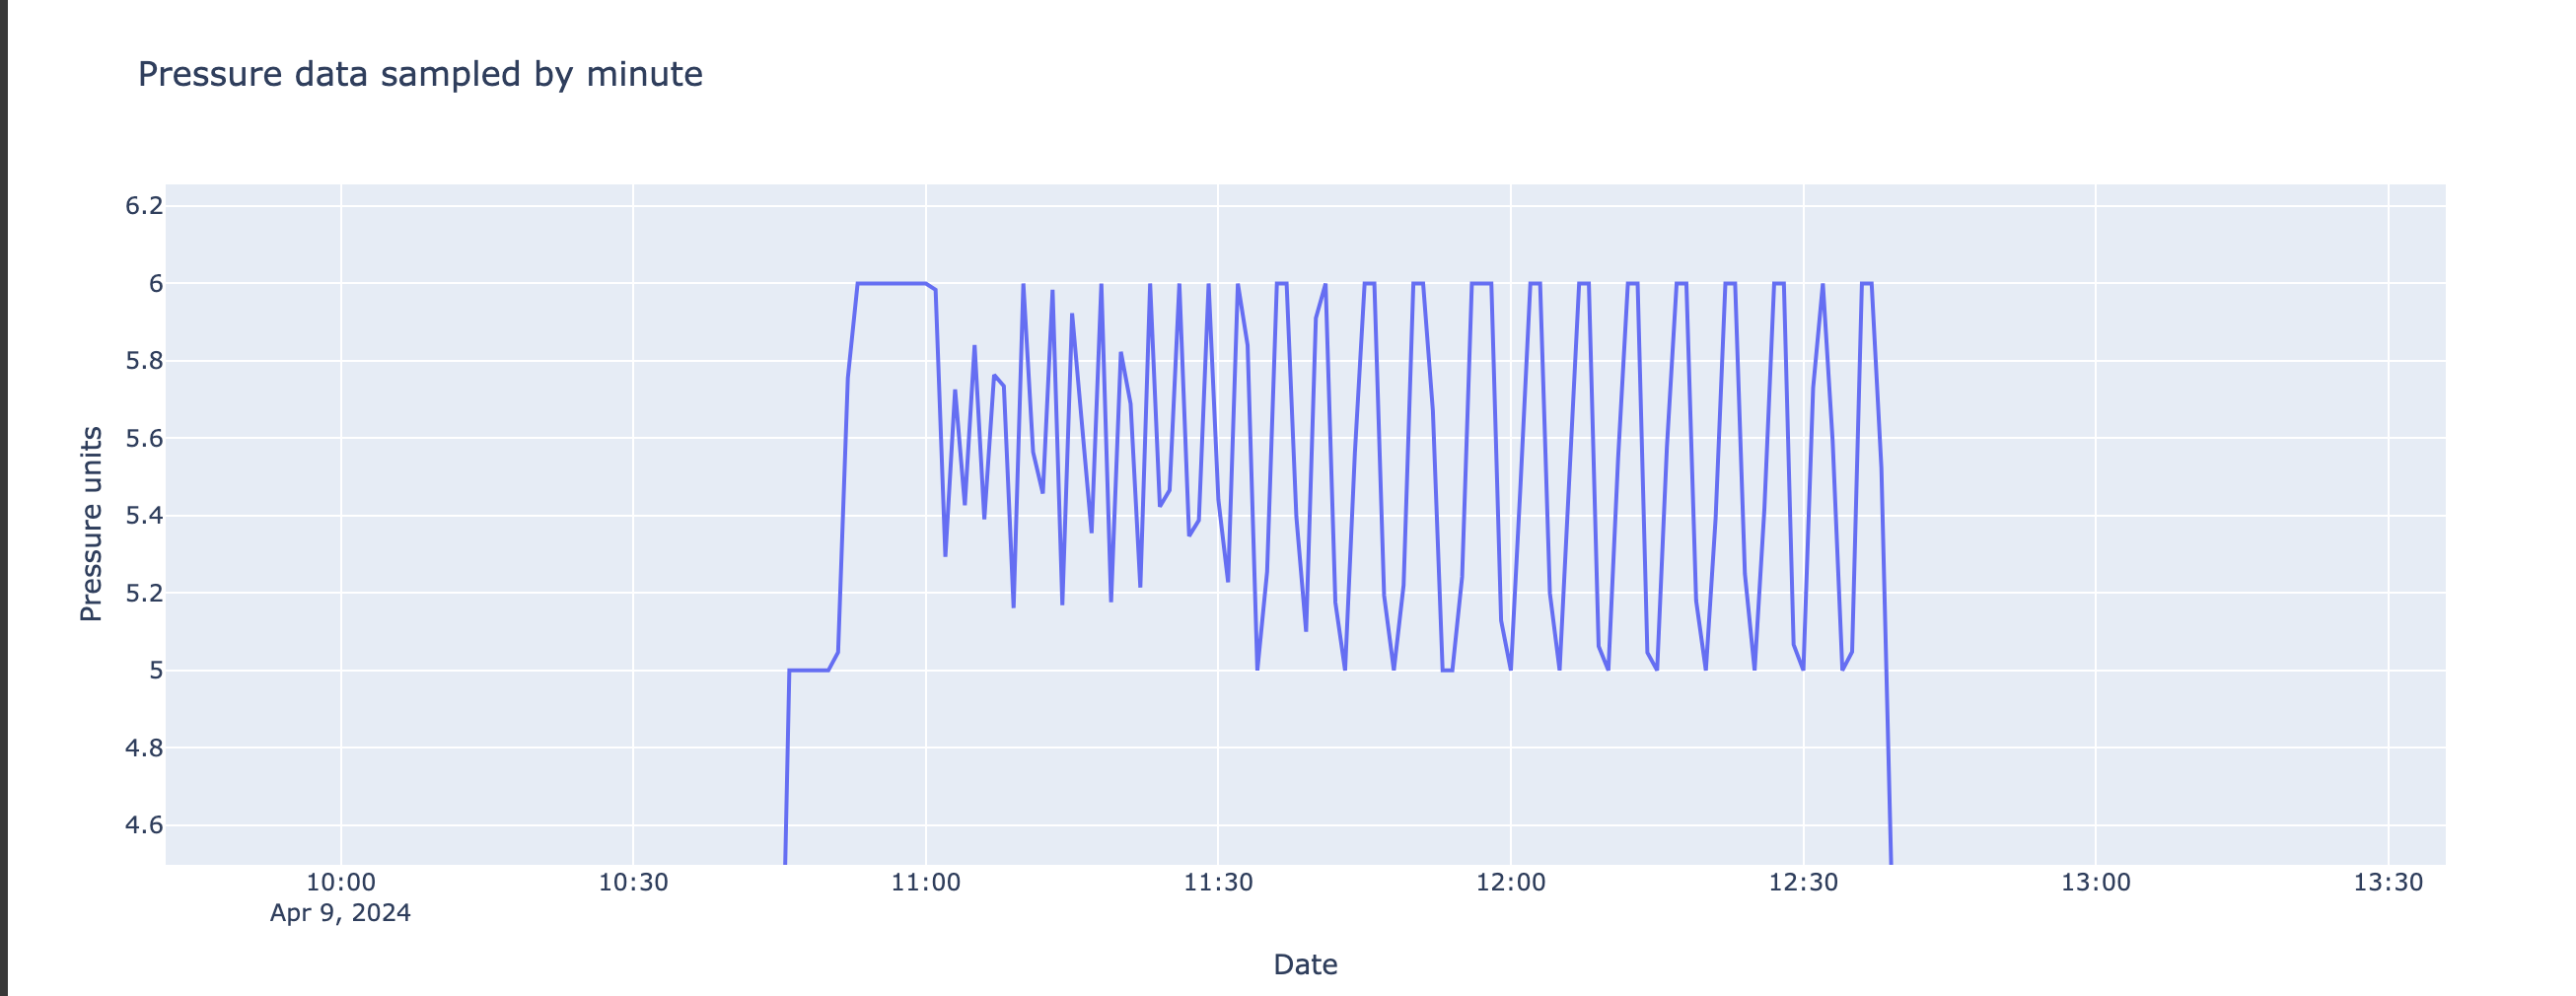

##Insights:
No data at 04.09.24 17:00 to 19:00
  Maybe the machine was disconnected, low voltage check with maintenance or automation team.

Temperature fall the last two days

Oscilations in Pressure and temperature at 04.09 12:00

Since 04.09 night the machine presented erratic cycles